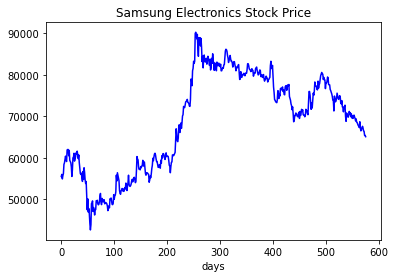

In [5]:
# 라이브러리 포함
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
# 삼성전자 코드='005930', 2020년 데이터부터 다운로드
samsung = fdr.DataReader('005930', '2020')
# 시작가만 취한다.
seq_data = (samsung[['Open']]).to_numpy()
# 선형 그래프로 그린다.
plt.plot(seq_data, color='blue')
plt.title("Samsung Electronics Stock Price") 
plt.xlabel("days")
plt.ylabel("")
plt.show()

In [8]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

samsung = fdr.DataReader('005930', '2016') 
print(samsung)
openValues = samsung[['Open']]

from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range = (0, 1)) 
scaled = scaler.fit_transform(openValues)
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2022-04-25  66500  66700  66300  66300  11016474 -0.010448
2022-04-26  66400  66700  66100  66100  12946923 -0.003017
2022-04-27  65400  65500  64900  65000  18122084 -0.016641
2022-04-28  65400  65500  64500  64800  16895527 -0.003077
2022-04-29  65100  67600  65000  67400  26088739  0.040123

[1555 rows x 6 columns]


In [9]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), activation='tanh', return_sequences=False)) 
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
83/83 [==============================] - 5s 14ms/step - loss: 0.0558
Epoch 2/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0021
Epoch 3/100
83/83 [==============================] - 1s 15ms/step - loss: 0.0012
Epoch 4/100
83/83 [==============================] - 1s 14ms/step - loss: 0.0011
Epoch 5/100
83/83 [==============================] - 1

83/83 [==============================] - 1s 14ms/step - loss: 6.4704e-04
Epoch 87/100
83/83 [==============================] - 1s 14ms/step - loss: 6.2241e-04
Epoch 88/100
83/83 [==============================] - 1s 14ms/step - loss: 6.5978e-04
Epoch 89/100
83/83 [==============================] - 1s 14ms/step - loss: 6.4306e-04
Epoch 90/100
83/83 [==============================] - 1s 14ms/step - loss: 6.0758e-04
Epoch 91/100
83/83 [==============================] - 1s 14ms/step - loss: 6.4488e-04
Epoch 92/100
83/83 [==============================] - 1s 14ms/step - loss: 6.1592e-04
Epoch 93/100
83/83 [==============================] - 1s 14ms/step - loss: 6.0217e-04
Epoch 94/100
83/83 [==============================] - 1s 14ms/step - loss: 6.3978e-04
Epoch 95/100
83/83 [==============================] - 1s 15ms/step - loss: 6.2253e-04
Epoch 96/100
83/83 [==============================] - 1s 15ms/step - loss: 6.0312e-04
Epoch 97/100
83/83 [==============================] - 1s 14ms/step 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


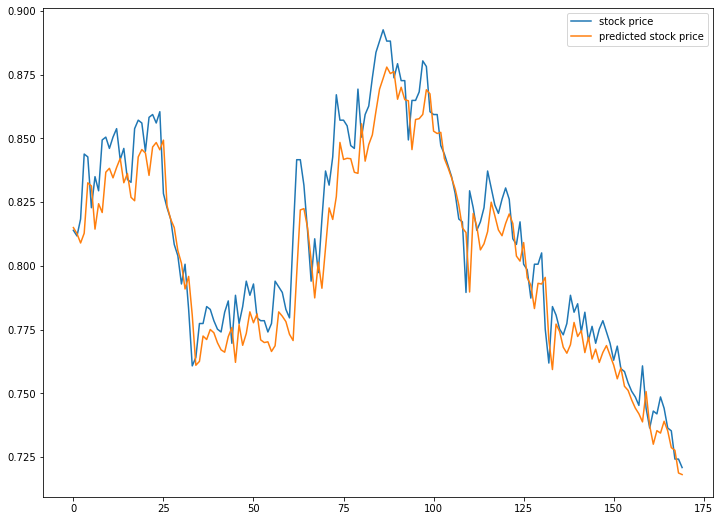

In [13]:
X_test, y_test = make_sample(test_data, 30) 
pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price') 
plt.legend()
plt.show()